<a href="https://colab.research.google.com/github/RubenCedillo123/Machine-Learning/blob/main/ClasePerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Librerías***

In [ ]:
import pandas as pd
import numpy as np

# Introducción

* Las redes se hicieron al inicio principalmente para algebra booleana
+ Como funcionan?
+ Explicar que es una máquina de turing
+ La clase tiene una perspectiva más física y no tan computacional

+ Automata: Computadora o  algo que hace calculos lógicos
+ ¿Qué es un módelo turing? ¿Dif con una red neuronal?
  + La maquina de turing resuleve algo lógico, buscan el camino más optimo
  + Determina un teorema lógico: "Activación (rebasar un umbrla)"
    + +1 actv. -1 desct, sumas todas las funciones y nuevamente pasa por una neurona

  + Función de actiavación Heaviside (0 y 1)
  + Esto fue tan novedoso por la forma tan nueva en la que resolvio los problemas
  + La curva de umbral es frontera

# ***4.2***

In [ ]:
def neurona_mcculloch_pitts(entradas, pesos, umbral):
# Calcular la suma ponderada de las entradas
  suma_ponderada = np.dot(entradas, pesos)
# Aplicar la funci ́on de activaci ́on (escal ́on de Heaviside)
  salida = 1.0 if suma_ponderada >= umbral else 0.0
  return salida


# Valores de entrada
entradas = np.array([0.5, 0.3, 0.8])
pesos = np.array([0.2, 0.4, 0.6])
umbral = 0.7
# Calcular la salida de la neurona
salida = neurona_mcculloch_pitts(entradas, pesos, umbral)
print("Salida:", salida)

Salida: 1.0


# ***4.3 Aplicaci ́on: puerta l ́ogica AND***

In [ ]:
columnas = ['x1', 'x2', 'AND']
puerta_and = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]
tabla = pd.DataFrame(puerta_and, columns=columnas)
tabla.head()

,x1,x2,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


* esta nueva apliación Heavisade podemos demostrar la existencias de una recta de separación

In [ ]:
#compuerta ogica #y#

casos = [
([0, 0], 0),
([0, 1], 0),
([1, 0], 0),
([1, 1], 1),
]
pesos = np.array([1, 1])
umbral = 2
for entrada, salida_esperada in casos:
  salida = neurona_mcculloch_pitts(np.array(entrada), pesos, umbral)
  print(f"Entrada: {entrada}, Salida: {salida}, Salida esperada: {salida_esperada}")

Entrada: [0, 0], Salida: 0.0, Salida esperada: 0
Entrada: [0, 1], Salida: 0.0, Salida esperada: 0
Entrada: [1, 0], Salida: 0.0, Salida esperada: 0
Entrada: [1, 1], Salida: 1.0, Salida esperada: 1


* Que las soluciones sean iguales a la tabla índica que la neurona puede diferenciar o resolver problemas lógicos

* Reproducir una compuerta lóogica "y" y "o", es lo que estamos haciendo

In [ ]:

# o
casos = [
([0, 0], 0),
([0, 1], 1),
([1, 0], 1),
([1, 1], 1),
]
pesos = np.array([1, 1])
umbral = 1
for entrada, salida_esperada in casos:
  salida = neurona_mcculloch_pitts(np.array(entrada), pesos, umbral)
  print(f"Entrada: {entrada}, Salida: {salida}, Salida esperada: {salida_esperada}")

Entrada: [0, 0], Salida: 0.0, Salida esperada: 0
Entrada: [0, 1], Salida: 1.0, Salida esperada: 1
Entrada: [1, 0], Salida: 1.0, Salida esperada: 1
Entrada: [1, 1], Salida: 1.0, Salida esperada: 1


# ***5.1***

In [ ]:
from sklearn.linear_model import Perceptron
X = tabla.values[:, 0:2]
y = tabla.values[:, 2]
nn = Perceptron(eta0=0.01, max_iter=10, random_state=1)
nn.fit(X, y)
print(nn.coef_) # pesos
print(nn.intercept_) # sesgo

[[0.02 0.02]]
[-0.03]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = nn.predict(X)
print("Precisi ́on:", accuracy_score(y, y_pred))
print("Salidas predichas:", y_pred)

Precisi ́on: 1.0
Salidas predichas: [0 0 0 1]


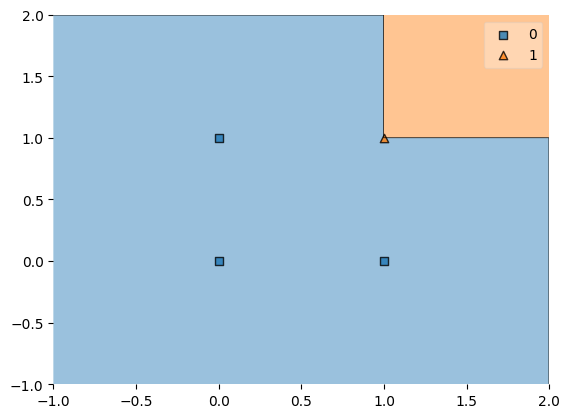

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X, y, clf=nn)
plt.show()

In [ ]:
print("w1 =", nn.coef_[0][0])
print("w2 =", nn.coef_[0][1])
print("b =", nn.intercept_[0])
print("Recta: x1 + x2 =", round(-nn.intercept_[0]/nn.coef_[0][0], 2))

w1 = 0.019999999999999997
w2 = 0.02
b = -0.03
Recta: x1 + x2 = 1.5


+ El percepetron no necesita cambiar de umbral

In [ ]:

columnas = ['x1', 'x2', 'OR']
puerta_xor = [[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
tabla = pd.DataFrame(puerta_xor, columns=columnas)
tabla.head()

,x1,x2,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
X = tabla.values[:, 0:2]
y = tabla.values[:, 2]
nn = Perceptron(eta0=0.01, max_iter=10, random_state=1)
nn.fit(X, y)
print(nn.coef_) # pesos
print(nn.intercept_) # sesgo

[[0.02 0.02]]
[-0.01]


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = nn.predict(X)
print("Precisi ́on:", accuracy_score(y, y_pred))
print("Salidas predichas:", y_pred)

Precisi ́on: 1.0
Salidas predichas: [0 1 1 1]


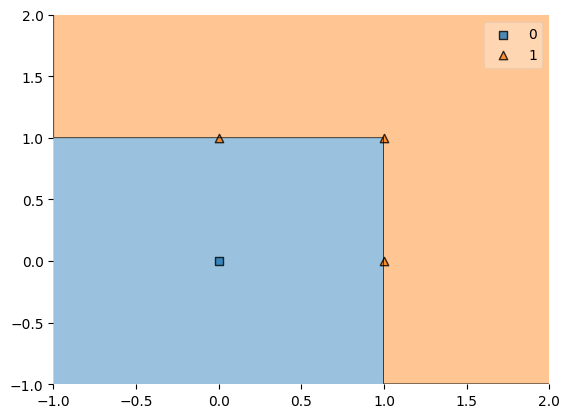

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X, y, clf=nn)
plt.show()

# ***5.2 Limitaciones del perceptr ́on***

In [ ]:
#compuerta ogica xor

casos = [
([0, 0], 0),
([0, 1], 1),
([1, 0], 1),
([1, 1], 0),
]
pesos = np.array([1, 1])
umbral = 1
for entrada, salida_esperada in casos:
  salida = neurona_mcculloch_pitts(np.array(entrada), pesos, umbral)
  print(f"Entrada: {entrada}, Salida: {salida}, Salida esperada: {salida_esperada}")

Entrada: [0, 0], Salida: 0.0, Salida esperada: 0
Entrada: [0, 1], Salida: 1.0, Salida esperada: 1
Entrada: [1, 0], Salida: 1.0, Salida esperada: 1
Entrada: [1, 1], Salida: 1.0, Salida esperada: 0


In [ ]:
cols = ['x1', 'x2', 'XOR']
puerta_xor=[[0,0,0], [1,0,1], [0,1,1], [1,1,0]]
df = pd.DataFrame(puerta_xor, columns=cols)
df.head()
#has las graficas

,x1,x2,XOR
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


* No puede resoverlo, no importa el umbral, por la linealidad el perceptron no puede resolver el problema
+ Por eso llegaron las funciones TRASCENDENTALES no lineales de activación
+ Cuando se demostro que el perceptron no podía llego la segunda etapa fría de la IA


# ***5.3 Implementaci ́on en Scikit-Learn de un multi-layer perceptron***

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic',
solver='lbfgs', random_state=1, max_iter=1000)

In [ ]:
X = [[0,0,0], [1,0,1], [0,1,1], [1,1,0]]

In [ ]:
y = [[0], [1], [1], [0]]

In [ ]:
mlp.fit(X, y)
y_pred = mlp.predict(X)
print(accuracy_score(y, y_pred))
plot_decision_regions(X.astype(np.float32), y.astype(np.int32), clf=mlp)
plt.show()

1.0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'list' object has no attribute 'astype'